In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [22]:
dataset_path = r'D:\sai\st\task4\leapGestRecog\leapGestRecog'
IMG_SIZE = 60
images = []
labels = []
for participant_folder in os.listdir(dataset_path):
    participant_path = os.path.join(dataset_path, participant_folder)
    if os.path.isdir(participant_path):
        for gesture_folder in os.listdir(participant_path):
            gesture_path = os.path.join(participant_path, gesture_folder)
            if os.path.isdir(gesture_path):
                for img_file in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    images.append(img)
                    labels.append(gesture_folder)
images = np.array(images)
labels = np.array(labels)
print("Number of images:", images.shape[0])
print("Image shape:", images.shape[1:])
print("Number of labels:", labels.shape[0])

Number of images: 20000
Image shape: (60, 60)
Number of labels: 20000


In [16]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# Normalize image data
images = images / 255.0
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for CNN input

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.35, random_state=42)

In [21]:
# Define the model
model = Sequential()

model.add(Conv2D(40, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(50, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(130, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(labels.shape[1], activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 40)     │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 50)     │        18,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        57,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 130)            │       599,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,658 (2.58 MB)

 Trainable params: 676,658 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9955 - loss: 0.0188 - val_accuracy: 0.9999 - val_loss: 5.6916e-04
Epoch 2/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.9976 - loss: 0.0092 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 3/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.9978 - loss: 0.0085 - val_accuracy: 0.9999 - val_loss: 5.6823e-04
Epoch 4/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.9962 - loss: 0.0142 - val_accuracy: 0.9999 - val_loss: 1.6640e-04
Epoch 5/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9999 - val_loss: 3.0734e-04
Epoch 6/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9997 - val_loss: 6.7282e-04
Epoch 7/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 8/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.99

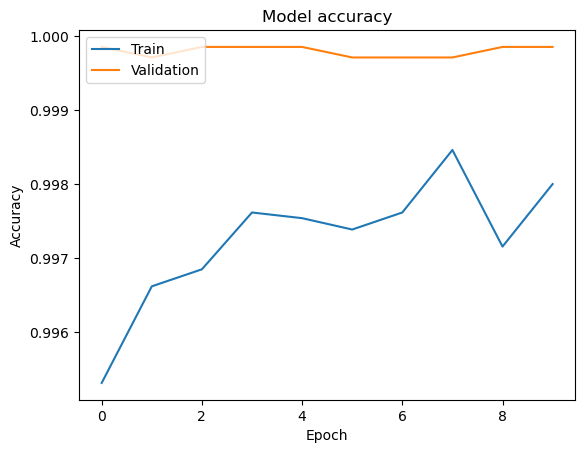

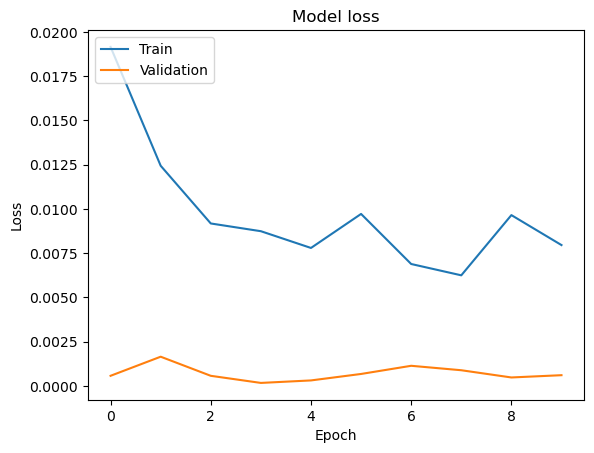

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

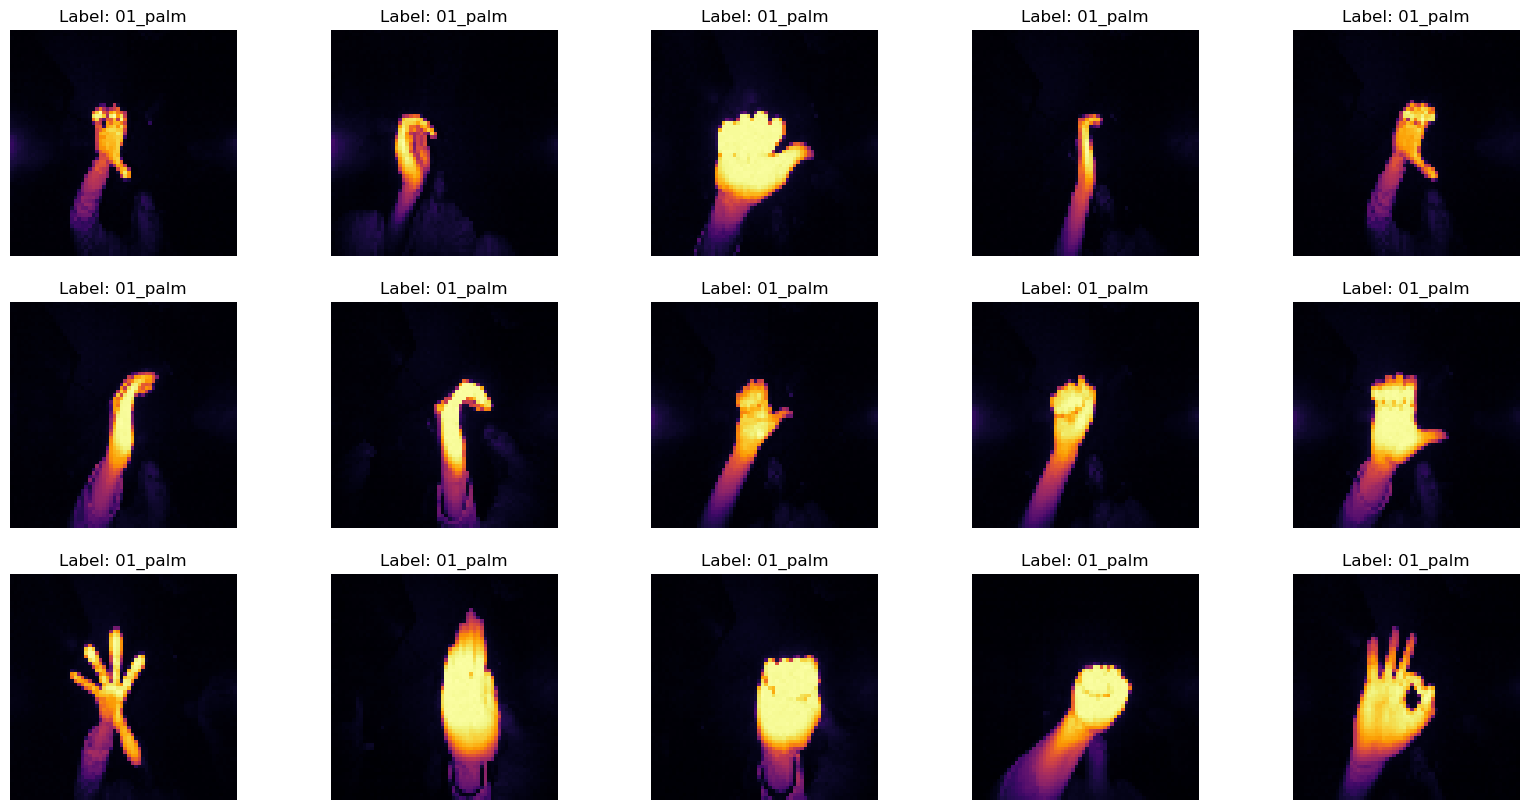

In [9]:
# Assuming you have `images` and `labels` already defined as arrays
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

def display_sample_images(images, labels, label_encoder, num_images=15, IMG_SIZE=64):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(3, num_images // 3, i + 1)
        plt.imshow(images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='inferno')
        plt.title(f"Label: {label_encoder.inverse_transform([np.argmax(labels[i])])[0]}")
        plt.axis('off')
    plt.show()
display_sample_images(X_train, y_train, label_encoder, num_images=15)